In [1]:
from spectral import *
import csv
import matplotlib.pyplot as plt
import pandas as pd
import wx
from wx import glcanvas
import numpy as np
import functools
import operator

In [5]:
feature_df = pd.read_csv('total_features.csv', delimiter=',')
lambdas_df = pd.read_csv('wavelength_values.csv', delimiter=',')
artif_df = pd.read_csv('total_artificial.csv', delimiter=',')

train = feature_df.iloc[:, :40]
test = feature_df.iloc[:, 40:]

feature_arr = feature_df.values
lambdas_arr = lambdas_df.values
artif_arr = artif_df.values


#format lambdas
lambdas =[]
for i in range(len(lambdas_arr)):
    lambdas.append(lambdas_arr[i][0])

artif_df = artif_df.transpose()
train = train.transpose()
test = test.transpose()


print(len(test))

12


In [3]:

def aLineFinder(X, Y,threshold,windowsize):
    outliers = [] 
    outliers = Y.rolling(window=windowsize, center=True).median() #finds outlier guesses using a rolling median technique
    y_out = [] 
    x_out = []
    for i in range(len(Y)):
        difference = np.abs(Y[i] - outliers[i]) #determines difference between outlier guesses and true x values
        if difference > threshold: # if this difference is too large, then the outlier guess is a truth
            y_out.append(Y[i])
            x_out.append(X[i])
    
    return x_out, y_out


def ImArraytodf(X,Y):
    array = []
    for i in range(272):
        array.append(int(X[i]))
    X_df = pd.Series(array)
    Y_df = pd.Series(Y)
    max_X  = X_df[Y_df.idxmax()]
    max_Y = Y_df.idxmax()

    return X_df, Y_df, max_X, max_Y


def getFeatures(X):
    # find repeated outliers
    flat_list = functools.reduce(operator.concat, X)
    principle_features, proportions = np.unique(flat_list, return_counts=True)
    
    # sort most heavily weighted features
    best_features = np.column_stack((principle_features, proportions))
    np.sort(best_features,axis = 0)
    best_features = best_features[np.lexsort((best_features[:, 1], ))]
    
    return best_features[:,0], best_features[:,1]


def getMetric(a,b,w):    
    
    ## dealing with different amounts of features between train and test
    #if len(a) > len(b):
    #    a = a[:len(b)]       
    #if len(b) > len(a):      
    #    b = b[:len(a)]
    #    w = w[:len(a)]  
    #print(a,b)
    #q = a-b
    #weightedDist = np.sqrt((w*q*q).sum())
    commonVals = np.intersect1d(a,b)
    acc = len(commonVals)/len(b)
    
    #if weightedDist > 40:
    #    print('The data presented is not from the same body of water')
    
    return  acc

In [4]:
threshold = 30
windowsize = 8

Text(0.5, 0, 'Features [nm]')

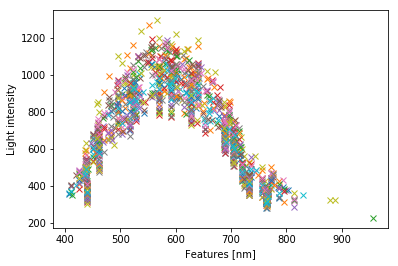

In [5]:
### training

abs_X = []
abs_Y = []
for i in range(len(train)):
    x_vals, y_vals = aLineFinder(lambdas, train.iloc[i],threshold, windowsize)
    abs_X.append(x_vals)
    abs_Y.append(y_vals)
true_features, true_proportions = getFeatures(abs_X)
    
for i in range(len(abs_X)):
    plt.plot(abs_X[i],abs_Y[i], 'x')

plt.ylabel('Light intensity')
plt.xlabel('Features [nm]')
#plt.savefig('totalfeatures.jpg')


[702.95307803 689.59824177 720.75952637 462.56602544 438.08215898
 440.30796502 569.40471548 731.88855658 763.04984117 765.27564722]
[31. 31. 32. 32. 33. 34. 37. 38. 39. 40.]
0.7094594594594594


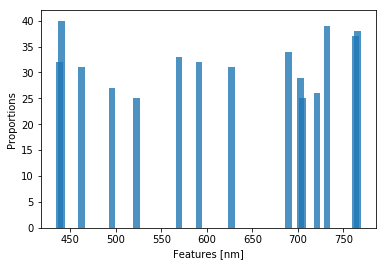

In [6]:
### testing true values

test_X = []
test_Y = []
for i in range(len(test)):
    x_vals, y_vals = aLineFinder(lambdas, test.iloc[i],threshold, windowsize)
    test_X.append(x_vals)
    test_Y.append(y_vals)
test_features, test_proportions = getFeatures(test_X)
acc = getMetric(test_features, true_features,true_proportions)

print(test_features[-10:])
print(true_proportions[-10:])

#plt.bar(test_features, test_proportions, align='center', alpha=0.5)
plt.bar(true_features[-15:], true_proportions[-15:], align='center', alpha=0.8, width=7)
plt.ylabel('Proportions')
plt.xlabel('Features [nm]')
#plt.savefig("features_bar.jpg")
print(acc)

In [7]:
### testing false values

false_X = []
false_Y = []
for i in range(len(artif_df)):
    x_vals, y_vals = aLineFinder(lambdas, artif_df.iloc[i],threshold, windowsize)
    false_X.append(x_vals)
    false_Y.append(y_vals)
testF_features, testF_proportions = getFeatures(false_X)
acc = getMetric(testF_features, true_features,true_proportions)

print(1-acc)

#for i in range(len(test_features)):
#    plt.bar(testF_features, testF_proportions, align='center', alpha=0.5)
#    #plt.bar(true_features, true_proportions, align='center', alpha=0.5)
#plt.show()



0.6689189189189189


In [56]:
print(artif_df)
print(train)

          0    1    2    3    4    5    6    7    8    9   ...   262  263  \
image_0   310  298  321  289  340  348  374  362  393  379 ...   317  298   
image_1   304  295  333  280  348  340  350  358  388  391 ...   303  283   
image_2   306  295  304  276  320  299  334  295  340  310 ...   311  292   
image_3   305  277  312  274  304  308  315  318  332  322 ...   301  294   
image_4   300  285  312  272  311  295  320  286  316  299 ...   307  294   
image_5   315  284  311  267  312  301  315  303  331  313 ...   306  287   
image_6   299  301  306  263  315  285  313  309  319  296 ...   308  274   
image_7   313  283  305  269  309  303  314  295  302  307 ...   295  296   
image_8   309  281  305  259  306  272  305  291  311  292 ...   305  296   
image_9   307  283  307  267  306  294  314  303  313  305 ...   306  285   
image_10  308  291  322  276  309  306  323  309  329  313 ...   304  292   
image_11  305  295  309  266  296  294  310  298  321  301 ...   313  289   